In [18]:
# Training the RF model using the Training file 

import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load training dataset (REPLACE with Training.csv file)
df = pd.read_csv("/Users/carmenshero/Desktop/Datasets2/PT4_Training.csv")

# Create EC_Prefix (first two numbers from ec_numbers)
df["EC_Prefix"] = df["ec_numbers"].str.extract(r"^(\d+\.\d+)")

# Filter out EC prefixes with < 2 instances
prefix_counts = df["EC_Prefix"].value_counts()
df = df[df["EC_Prefix"].isin(prefix_counts[prefix_counts >= 2].index)].copy()

# Define and save the exact feature columns used (columns D–AF)
feature_cols = df.columns[3:33].tolist()  # D (index 3) to AF (index 32)
joblib.dump(feature_cols, "/Users/carmenshero/Desktop/Datasets2/rf_feature_columns.pkl")

# Train the model
X = df[feature_cols].astype(float)
y = df["EC_Prefix"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

rf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"📈 Random Forest Accuracy: {acc:.4f}")

# Save the trained model for prediction use
joblib.dump(rf, "/Users/carmenshero/Desktop/Datasets2/rf_model.pkl")


📈 Random Forest Accuracy: 0.8576


['/Users/carmenshero/Desktop/Datasets2/rf_model.pkl']

/Users/carmenshero/Desktop/DSCI350/VS-Code/ic01-python_intro/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carmenshero/Desktop/DSCI350/VS-Code/ic01-python_intro/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carmenshero/Desktop/DSCI350/VS-Code/ic01-python_intro/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

Classification Report:
              precision    recall  f1-score   support

         1.1       0.96      0.99      0.98       102
        1.10       1.00      0.50      0.67         4
        1.11       0.98      0.92      0.95        48
        1.12       1.00      0.25      0.40         4
        1.13       1.00      0.62      0.76        13
        1.14       0.96      0.64      0.77        67
        1.15       1.00      0.92      0.96        26
        1.16       1.00      0.50      0.67         4
        1.17       1.00      0.46      0.63        13
        1.18       0.90      0.64      0.75        14
         1.2       1.00      0.52      0.68        27
        1.20       1.00      0.75      0.86         4
        1.21       1.00      1.00      1.00         4
         1.3       1.00      0.14      0.24        22
         1.4       1.00      0.30      0.47        23
         1.5       1.00      0.49      0.65        37
         1.6       0.75      0.43      0.55         7
    

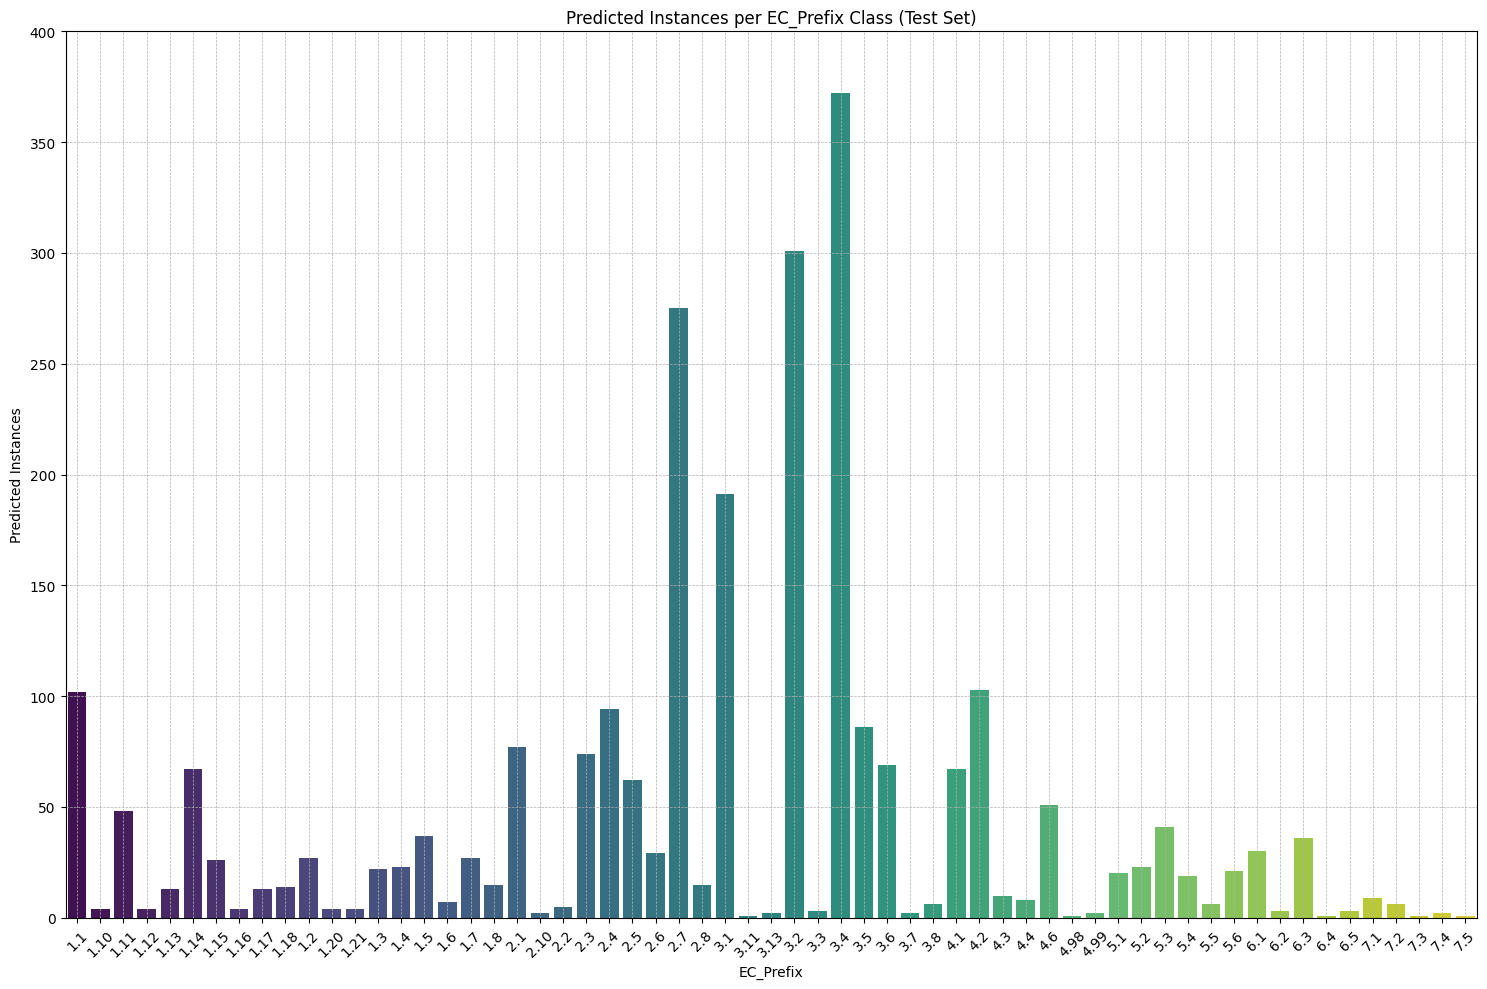

In [19]:
# Showing a classification report and barplot using with the test split results
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot: per-class accuracy
report_df = pd.DataFrame(report).transpose()
report_df = report_df[report_df.index.str.contains(r'\d+\.\d+')]  # Only classes

plt.figure(figsize=(15, 10))
sns.barplot(x=report_df.index, y=report_df["support"], palette="viridis")
plt.xticks(rotation=45)
plt.ylim(0, 400)
plt.title("Predicted Instances per EC_Prefix Class (Test Set)")
plt.ylabel("Predicted Instances")
plt.xlabel("EC_Prefix")
plt.tight_layout()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


In [20]:
# Using the model to predict the instances in the Prediction file
import pandas as pd
import numpy as np
import joblib

# Load the saved feature column list and trained model
feature_cols = joblib.load("/Users/carmenshero/Desktop/Datasets2/rf_feature_columns.pkl")
rf = joblib.load("/Users/carmenshero/Desktop/Datasets2/rf_model.pkl")

# Load prediction dataset (REPLACE with Prediction.csv file)
df_pred = pd.read_csv("/Users/carmenshero/Desktop/Datasets2/PT4_Prediction.csv")

# Add an empty EC_Prefix column if it's missing (it expects this column even though it's blank. Code doesn't work otherwise LOL)
if "EC_Prefix" not in df_pred.columns:
    df_pred["EC_Prefix"] = np.nan

# Prepare features (only those the model expects)
X_pred = df_pred[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Predict EC_Prefix
y_pred_classes = rf.predict(X_pred)
df_pred["Predicted_EC_Prefix"] = y_pred_classes

# Drops the empty EC_Prefix column
df_pred.drop(columns=["EC_Prefix"], inplace=True)

# Save results
output_file = "/Users/carmenshero/Desktop/Datasets2/PT4_Prediction.csv"
df_pred.to_csv(output_file, index=False)

print(f"Saved predictions to {output_file}")


Saved predictions to /Users/carmenshero/Desktop/Datasets2/PT4_Prediction.csv
